# Importing packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
#import PyWavelets as pw

In [2]:
img = cv2.imread("C:/Users/91638/Desktop/ML/Image classification/dataset/Somesh/20211107_144705.jpg")
img.shape

(4032, 3024, 3)

(x- coordinate, y-coordinate, RGB)

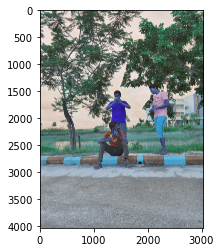

In [3]:
plt.imshow(img)

Converting the color image into gray scale

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(4032, 3024)

Here , if we see that, the shape attribute does not have a third value , because the image has been converted innto gray scale image.

Now, if we try to print the image, it would be an array of values ranging from 0 to 255 indicating the darkness of each of the pixels ranging from 0 to 255

In [5]:
gray

array([[215, 219, 222, ..., 159, 163, 164],
       [219, 219, 220, ..., 157, 163, 166],
       [219, 216, 218, ..., 189, 195, 197],
       ...,
       [138, 125, 124, ...,  99, 107, 114],
       [113, 102, 113, ..., 102, 104, 108],
       [123, 108, 116, ..., 111, 104, 107]], dtype=uint8)

When trying to show it as an image

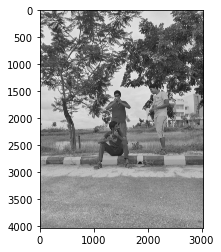

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier("C:/Users/91638/Desktop/ML/Image classification/haarcascade_frontalface.xml")
eye_cascade = cv2.CascadeClassifier("C:/Users/91638/Desktop/ML/Image classification/haarcascade_eye.xml")

faces =face_cascade.detectMultiScale(gray,1.3,5)
faces

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


Since there is no clear faces in the picture , it gave the output as empty set. Next, i'll give a photo with a clear face

In [8]:
img2 = cv2.imread("C:/Users/91638/Desktop/ML/Image classification/dataset/Ganesh Kumar/20220414_200149.jpg")
img.shape

(4032, 3024, 3)

In [9]:
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray2.shape

(4032, 3024)

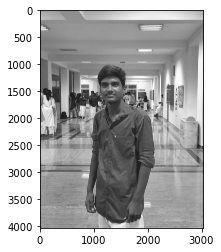

In [10]:
plt.imshow(gray2, cmap='gray')

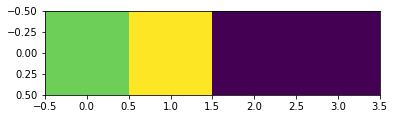

In [20]:
face_cascade = cv2.CascadeClassifier("C:/Users/91638/Desktop/ML/Image classification/haarcascade/haarcascade_frontalface.xml")
eye_cascade = cv2.CascadeClassifier("C:/Users/91638/Desktop/ML/Image classification/haarcascade/haarcascade_eye.xml")

faces =face_cascade.detectMultiScale(gray2,1.3,5)
faces
plt.imshow(faces)

Here, there is a list containing 4 values namely
(x, y, width , height) 
these are the coordinates and the size of where it recognized the face

In [30]:
(x,y,w,h) = faces[0]
x,y,w,h

(1040, 1192, 503, 503)

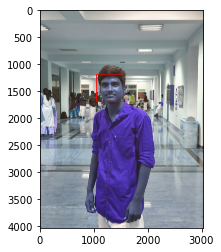

In [31]:
face_img = cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(face_img)

1. cv2.rectangle - it is used to draw a rectangle 
2. (255,0,0) - (red, blue,green)

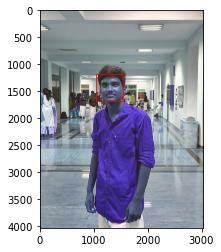

In [32]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)# drawing rectangle over the face
    roi_gray = gray2[y:y+h, x:x+w]# grayscale cropped face
    #roi - region of interest
    roi_color = face_img[y: y+h, x:x+w]#RGB cropped face with rectangles
    eyes = eye_cascade.detectMultiScale(roi_gray)# used to detect the eyes
    for (ex,ey,ew,eh) in eyes:# since there are 2 eyes, it is run in a for loop
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)# for each eye a green rectangle is drawn
    
plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()

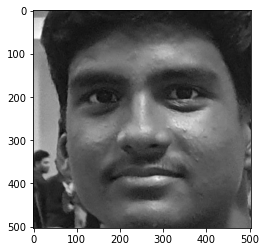

In [33]:
plt.imshow(roi_gray, cmap='gray')

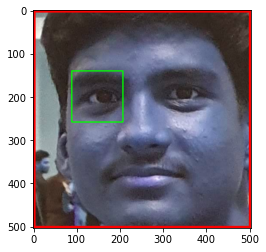

In [34]:
plt.imshow(roi_color, cmap = 'gray')

Above is the cropped image of ganesh's face

In [35]:
def get_cropped_image_if_2_eyes(image_path):#image is given as an input
    img = cv2.imread(image_path)#read the image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#coverting it to grayscale
    faces = face_cascade.detectMultiScale(gray,1.3,5)#detect faces
    for(x,y,w,h) in faces :
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

Testing of a clear image with two eyes

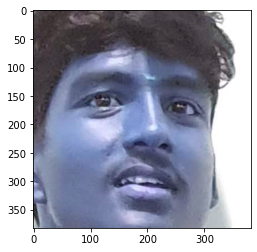

In [36]:
cropped_image = get_cropped_image_if_2_eyes("C:/Users/91638/Desktop/ML/Image classification/dataset/Ganesh Kumar/20220906_190650.jpg")
#cropped_image
plt.imshow(cropped_image)

Testing whether the function works when the face is not clear with two eyes

In [142]:
cropped_image_unclear= get_cropped_image_if_2_eyes("C:/Users/91638/Desktop/ML/Image classification/dataset/Ganesh Kumar/20220414_200149.jpg")
cropped_image_unclear

the above prints nothing , since the image does not have a clear face with 2 eyes

In [21]:
path_to_data = "C:/Users/91638/Desktop/ML/Image classification/dataset"
path_to_cr_data = "C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/"

Here," ./ " means current directory where the jupyter notebook file is kept

In [22]:
import os
img_direcs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_direcs.append(entry.path)# the names are stored in the list

1.  os.scandir(path_to_data) - it will go through all the sub directories within the dataset folder


In [23]:
img_direcs

['C:/Users/91638/Desktop/ML/Image classification/dataset\\cropped',
 'C:/Users/91638/Desktop/ML/Image classification/dataset\\Ganesh Kumar',
 'C:/Users/91638/Desktop/ML/Image classification/dataset\\Lasmivasa',
 'C:/Users/91638/Desktop/ML/Image classification/dataset\\Naveenkumar',
 'C:/Users/91638/Desktop/ML/Image classification/dataset\\Pradeep Kumar',
 'C:/Users/91638/Desktop/ML/Image classification/dataset\\Somesh',
 'C:/Users/91638/Desktop/ML/Image classification/dataset\\Sriman',
 'C:/Users/91638/Desktop/ML/Image classification/dataset\\Suntharavadivelan']

creating a folder using code 

In [40]:
import shutil
if os.path.exists(path_to_cr_data):# checks whether it exits
    shutil.rmtree(path_to_cr_data)# removing the folder
os.mkdir(path_to_cr_data)# creating the folder

In [41]:
cropped_image_direc =[]
celebrity_file_names_dict = {}

for img_direc in img_direcs:
    count = 1 # using it to name the images
    celebrity_name = img_direc.split('\\')[-1]# splitting the path into different segments
    # and taking the last element of the path which is the celebrity name
    
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = [] 
    #initializing the keys for the dictionary with blank arrays
    
    for entry in os.scandir(img_direc):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        #entry.path is the path of every image 
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name # path name for each folder in "cropped" folder
            if not os.path.exists(cropped_folder):#if that path does not exist
                os.makedirs(cropped_folder)# create a folder 
                cropped_image_direc.append(cropped_folder)#storing it in a list
                print("Generating cropped images in folder :", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count)+".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            # the above two lines are to name the images in the format of
            # celebrity_name(count).png
            cv2.imwrite(cropped_file_path,roi_color)# this stores the cropped images
            #in their respective folder
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            # appending all the image file paths in the respective keys in the dictionary
            count= count+1

cropped
Ganesh Kumar
Generating cropped images in folder : C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/Ganesh Kumar


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\ocl.cpp:6331: error: (-220:Unknown error code -220) OpenCL error CL_INVALID_COMMAND_QUEUE (-36) during call: clEnqueueWriteBuffer(q, handle=0000021955F16720, CL_TRUE, offset=0, sz=68224, data=00000219565299A0, 0, 0, 0) in function 'cv::ocl::OpenCLAllocator::upload'


# After this, manual data cleaning is done.
It is done by seeing the images and delete who are actually not the actual person.

Wavelet tranformation - it allows you to extract the important features

In [37]:
import pywt
import numpy as np
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    coeffs_H=list(coeffs)
    coeffs_H[0] *=0;
    
    imArray_H = pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

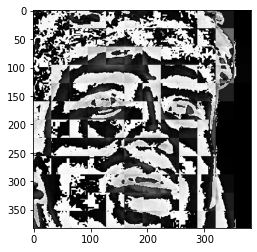

In [38]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [39]:
celebrity_file_names_dict 


NameError: name 'celebrity_file_names_dict' is not defined

Just assigning values for the celebrity names, which would be 'y'

In [161]:
del celebrity_file_names_dict['Suntharavadivelan']
del celebrity_file_names_dict['Somesh']
del celebrity_file_names_dict['Pradeep Kumar']
celebrity_file_names_dict

{'Ganesh Kumar': ['C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/Ganesh Kumar/Ganesh Kumar1.png',
  'C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/Ganesh Kumar/Ganesh Kumar2.png',
  'C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/Ganesh Kumar/Ganesh Kumar3.png',
  'C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/Ganesh Kumar/Ganesh Kumar4.png',
  'C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/Ganesh Kumar/Ganesh Kumar5.png',
  'C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/Ganesh Kumar/Ganesh Kumar6.png',
  'C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/Ganesh Kumar/Ganesh Kumar7.png',
  'C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/Ganesh Kumar/Ganesh Kumar8.png',
  'C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/Ganesh Kumar/Ganesh Kumar9.png',
  'C:/Users/91638/Desktop/ML/Image classification/dataset/cropped/Ganesh Kumar/Ganesh Kumar10

In [162]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
    
class_dict

{'Ganesh Kumar': 0, 'Lasmivasa': 1, 'Naveenkumar': 2, 'Sriman': 3}

In [163]:
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:# training_image is the path of each image
        img = cv2.imread(training_image) 
        if img is None:# since we manually deleted some images, we have to create this if statement
            continue # to avoid the errors
        scaled_raw_img = cv2.resize(img,(32,32))
        #scaling is done because while training, all the images should have same size
        img_har = w2d(img, 'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))# resizing wavelet image
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        #vertically stacking both the images together
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [164]:
len(x[0])# this is 32*32*3 + 32*32

4096

In [165]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(253, 4096)

In [166]:
x[0]

array([ 39.,  22.,  19., ...,  33.,  20., 242.])

The above is done to avoid errors in future where we use sklearn

# With this, data cleaning process is done.

## TRAINING THE MODEL

SVM

importing the necessary modules

In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [187]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel ='rbf',C =10))])
pipe.fit(x_train,y_train)
#pipe.score(x_train,y_train)
pipe.score(x_test,y_test)

0.875

In [189]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.88      0.93      0.90        15
           2       0.87      0.87      0.87        30
           3       1.00      0.57      0.73         7

    accuracy                           0.88        64
   macro avg       0.90      0.84      0.86        64
weighted avg       0.88      0.88      0.87        64



Now, GridSearchCV is used to try out different models with different parameters. It is used to come up with the best model with best fine tuned parameters

Importing packages

In [190]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [195]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear',multi_class ='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [196]:
scores = []
best_estimators = {}
import pandas as pd
for algo,mp in model_params.items():# used to iterate through the above dictionary
    pipe = make_pipeline(StandardScaler(),mp['model'])#scaling
    clf = GridSearchCV(pipe,mp['params'],cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.762020,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.666572,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.762304,{'logisticregression__C': 1}


clf - classifier

In [199]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.796875

In [200]:
best_estimators['svm'].score(x_test,y_test)

0.875

In [201]:
best_estimators['random_forest'].score(x_test,y_test)

0.71875

Thus SVM gives the best score

Now, we are going to visualize for how many occasions our model predicted it correctly

In [203]:
best_clf = best_estimators['svm']

In [204]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[12,  0,  0,  0],
       [ 0, 14,  1,  0],
       [ 2,  2, 26,  0],
       [ 0,  0,  3,  4]], dtype=int64)

 To see it clearly, we are going to plot it in a graph using seaborn

Text(69.0, 0.5, 'Truth')

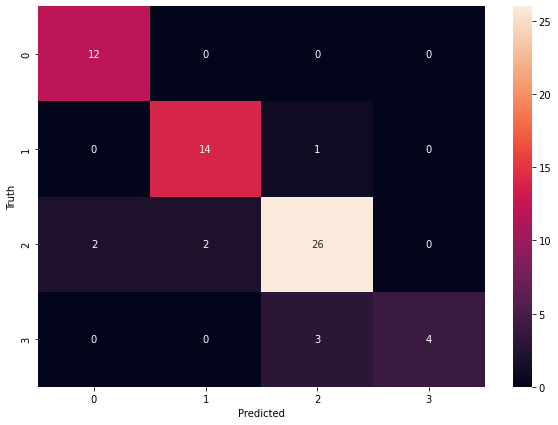

In [205]:
import seaborn as sns
plt.figure(figsize =(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [206]:
class_dict

{'Ganesh Kumar': 0, 'Lasmivasa': 1, 'Naveenkumar': 2, 'Sriman': 3}

# Saving the trained Model

In [207]:
!pip install joblib
import joblib

Now, saving the model as apicle in a file

In [208]:
joblib.dump(best_clf,'best_trained_model.pkl')

['best_trained_model.pkl']

And also saving the 'class_dict' file as it has the numbers representing the names of the person 

In [209]:
import json
with open("number_person_file.json","w") as f:
    f.write(json.dumps(class_dict))